In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scienceplots

from simulation import RegularPacking, OffsetRegularPacking, LowestPointFirstPacking, ClosestFirstPacking
plt.style.use(['science','ieee'])

R = 0.1

In [2]:
p = RegularPacking(100, 1e-3)
p.generate_packing(R)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
regular_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])
p = OffsetRegularPacking(100, 1e-3)
p.generate_packing(R)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
offset_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])
p = LowestPointFirstPacking(100, 1e-3)
p.generate_packing(R, n_points=3000)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
lowest_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])
p = ClosestFirstPacking(100, 1e-3)
p.generate_packing(R, n_points=3000)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
close_eigs = np.sort(np.linalg.eig(A.T @ K @ A)[0])

/home/jakeb/development/mdm-phase-b/simulation.py:220: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.incidence_matrix(


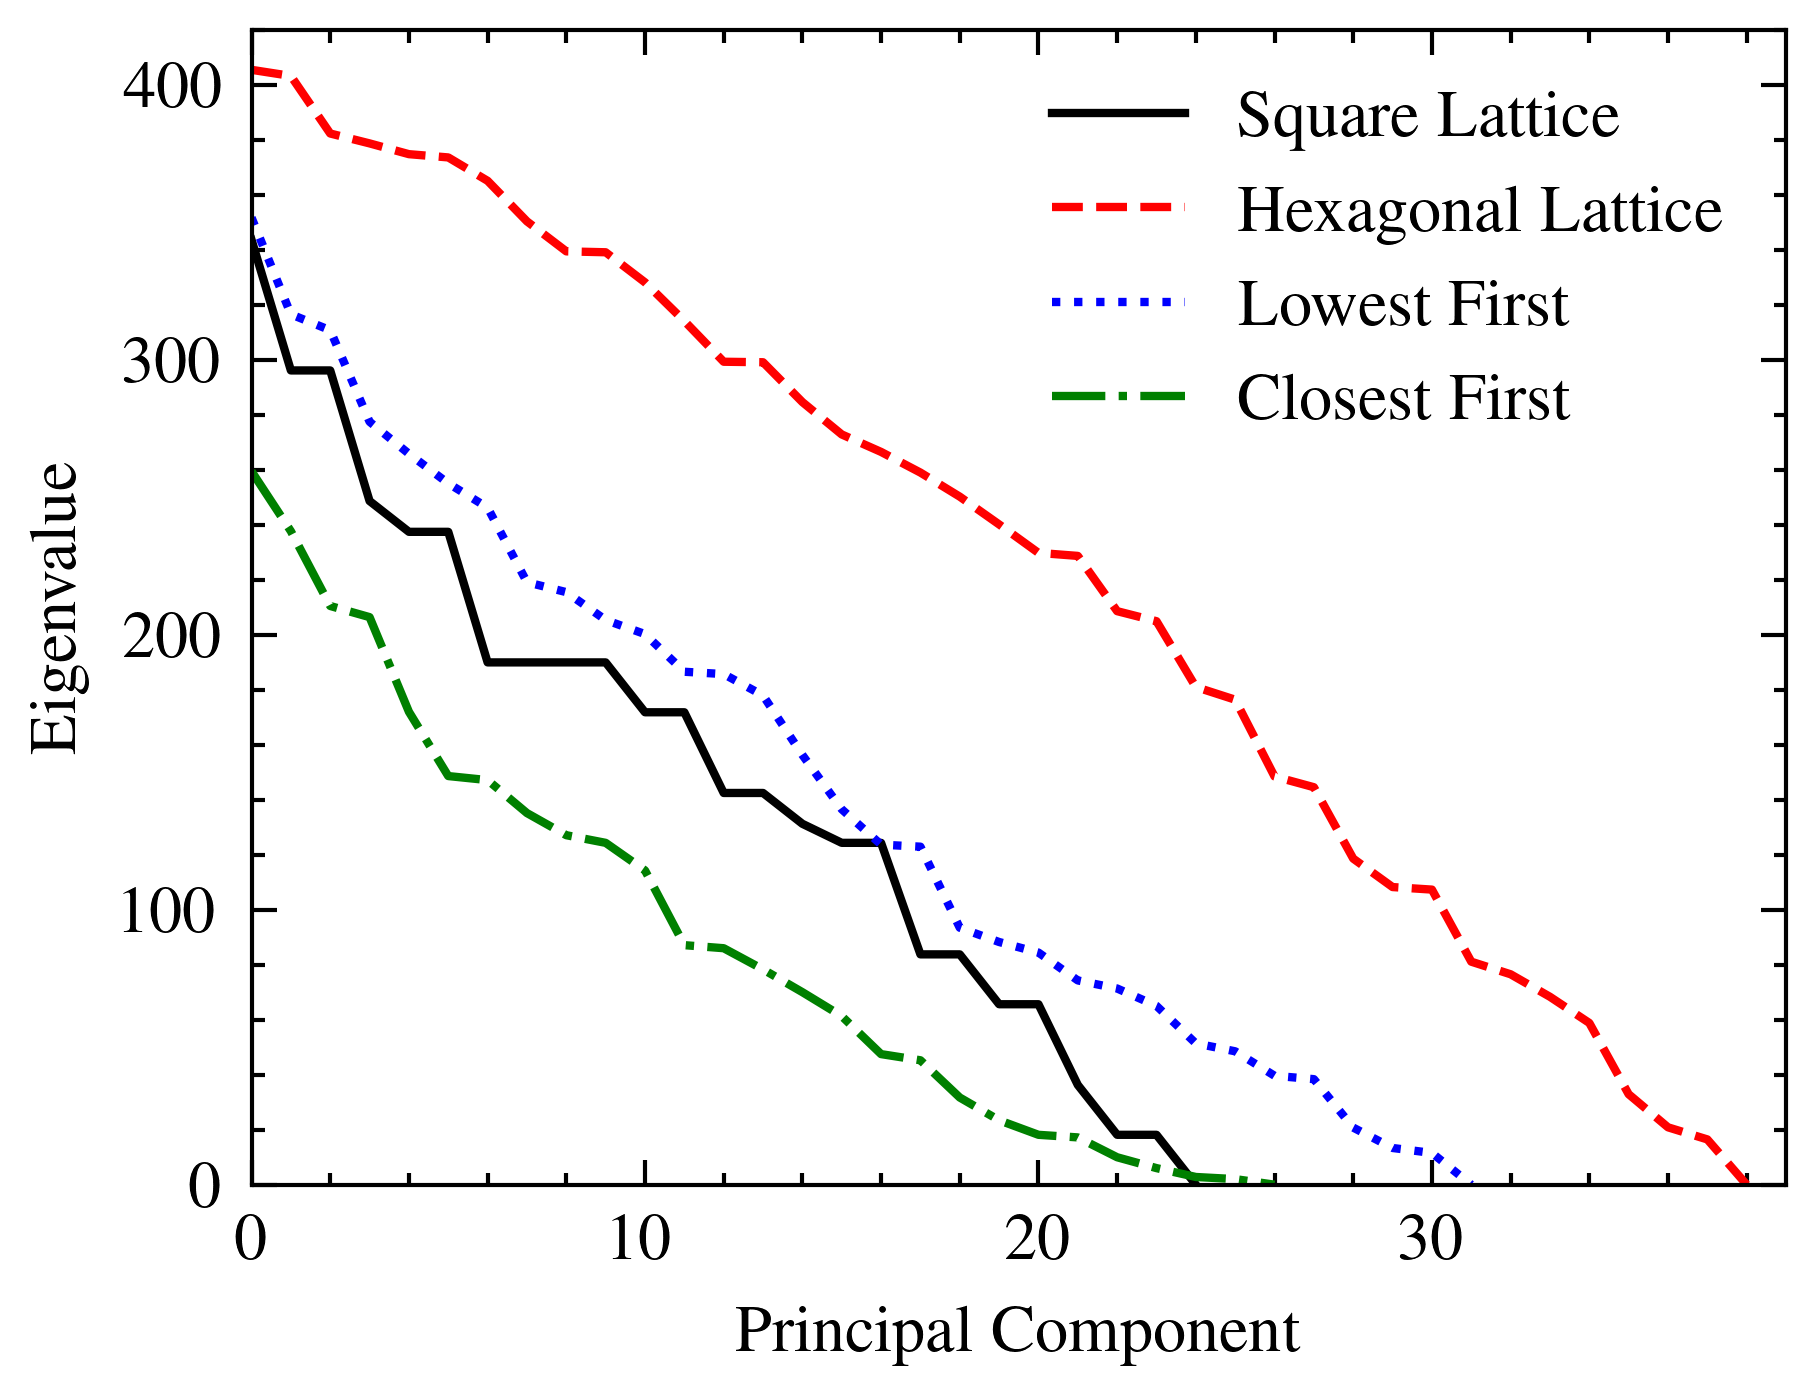

In [12]:
plt.plot(regular_eigs[::-1], label="Square Lattice")
plt.plot(offset_eigs[::-1], label="Hexagonal Lattice")
plt.plot(lowest_eigs[::-1], label="Lowest First")
plt.plot(close_eigs[::-1], label="Closest First")
plt.xlabel("Principal Component")
plt.ylabel("Eigenvalue")
plt.xlim((0, len(offset_eigs)))
plt.ylim((0,420))
plt.legend()
plt.savefig("eigs.pdf")
# plot the eigenvector on the graph

In [3]:
p = RegularPacking(100, 1e-3)
p.generate_packing(R)
p.generate_network()
regular_degree_centrality = sorted(nx.degree_centrality(nx.from_edgelist(p.pairs)).values())
p = OffsetRegularPacking(100, 1e-3)
p.generate_packing(R)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
offset_degree_centrality = sorted(nx.degree_centrality(nx.from_edgelist(p.pairs)).values())
p = LowestPointFirstPacking(100, 1e-3)
p.generate_packing(R, n_points=3000)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
lowest_degree_centrality = sorted(nx.degree_centrality(nx.from_edgelist(p.pairs)).values())
p = ClosestFirstPacking(100, 1e-3)
p.generate_packing(R, n_points=3000)
p.generate_network()
A = p._get_incidence_matrix()
K = p._get_conductivity_matrix()
close_degree_centrality = sorted(nx.degree_centrality(nx.from_edgelist(p.pairs)).values())


/home/jakeb/development/mdm-phase-b/simulation.py:228: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  nx.incidence_matrix(


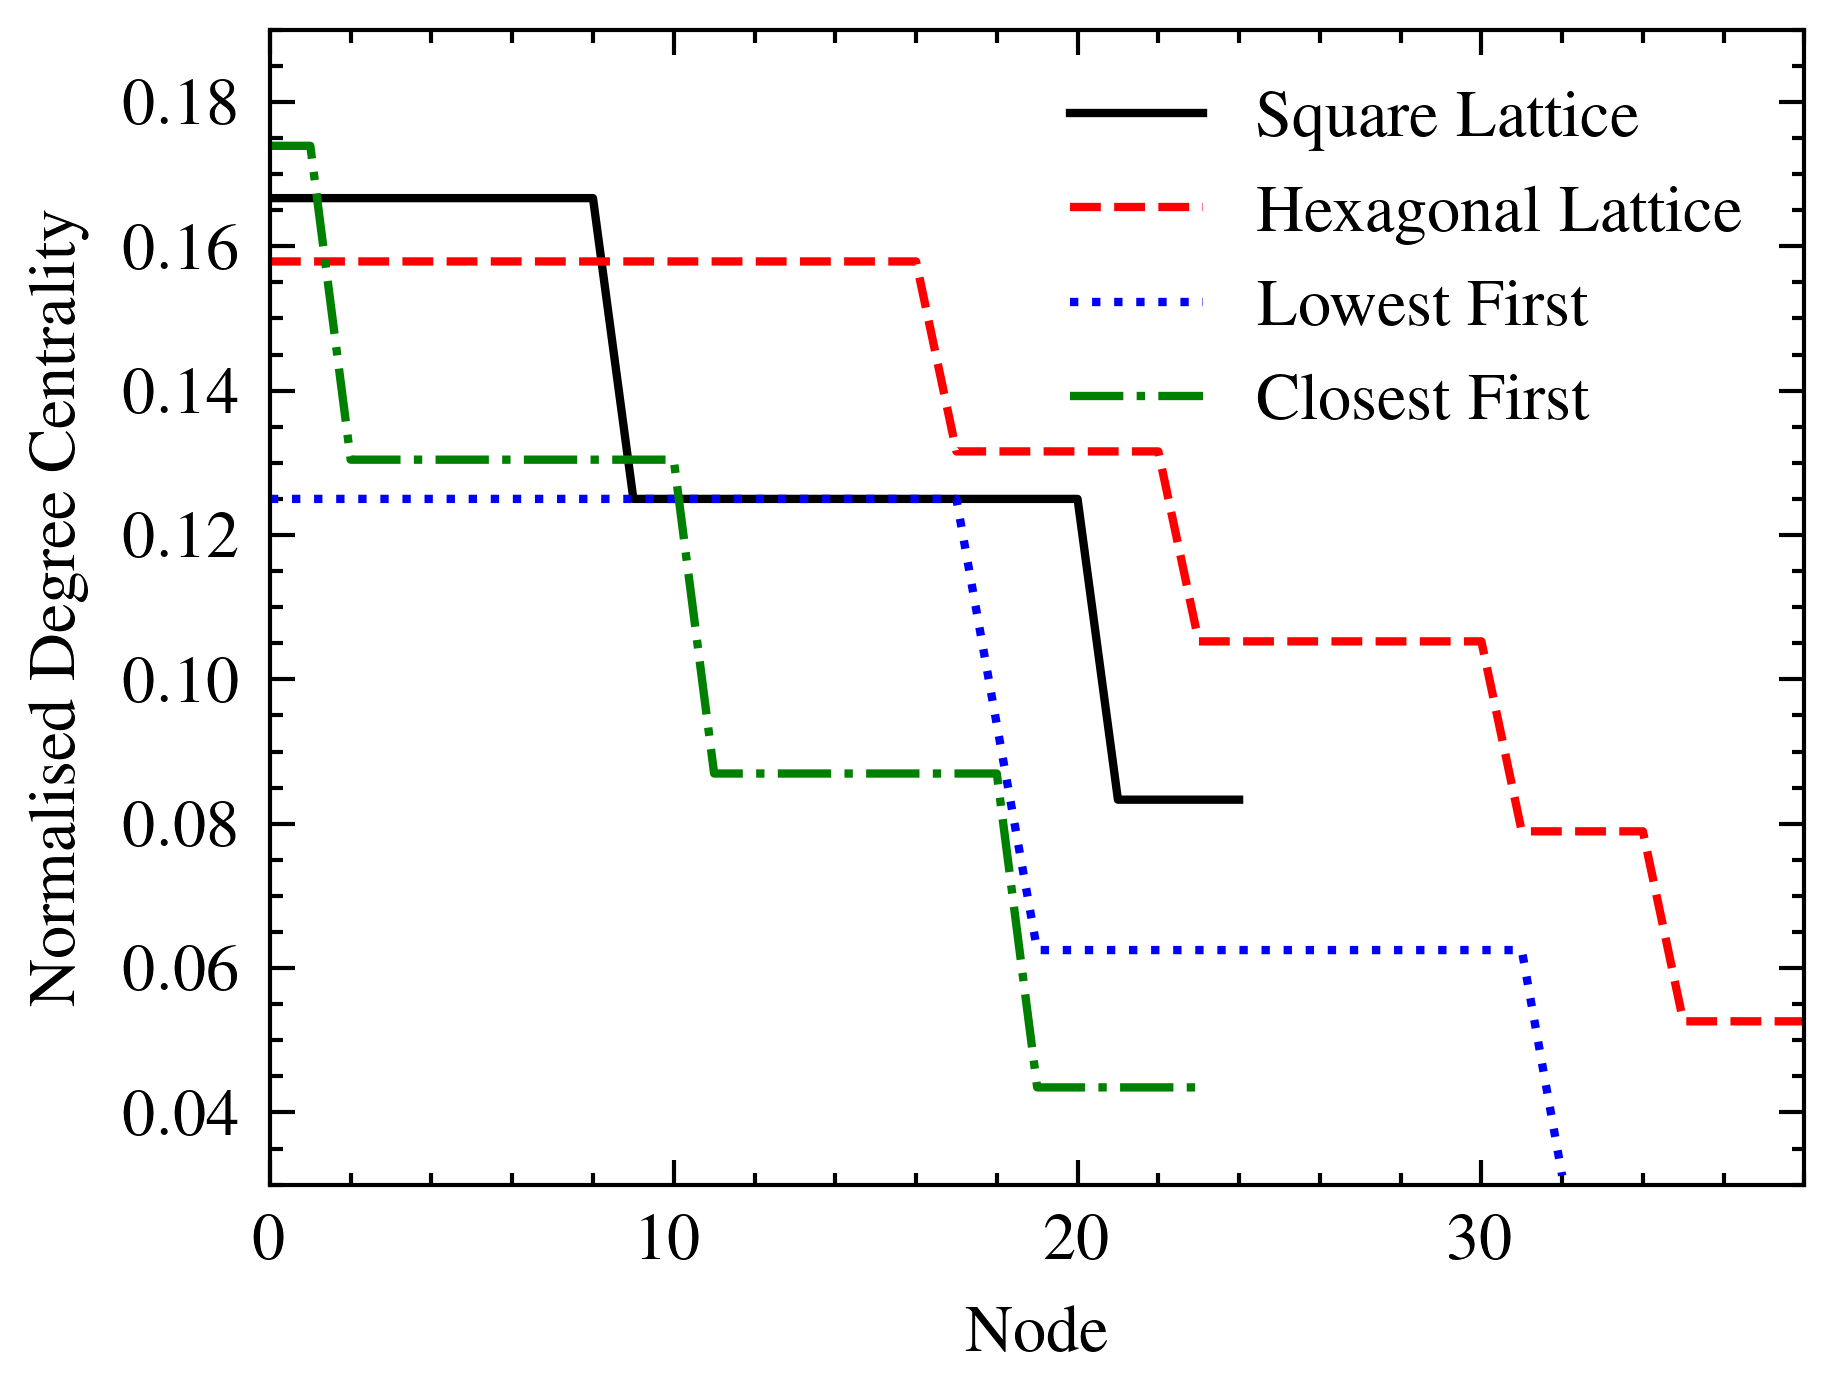

In [5]:
plt.plot(regular_degree_centrality[::-1], label="Square Lattice")
plt.plot(offset_degree_centrality[::-1], label="Hexagonal Lattice")
plt.plot(lowest_degree_centrality[::-1], label="Lowest First")
plt.plot(close_degree_centrality[::-1], label="Closest First")
plt.ylabel("Normalised Degree Centrality")
plt.xlabel("Node")
plt.xlim((0,len(offset_degree_centrality)-1))
plt.ylim((0.03,0.19))
plt.legend()
plt.savefig("degree.pdf")